<a href="https://colab.research.google.com/github/mars241/PYTHON/blob/main/Corr_FAFI_Moncef_2_1_Pandas_Merge_and_fill_missing_values.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Execute the code below

In [ ]:
import pandas as pd
import numpy as np
link = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather2019.csv"
df_weather = pd.read_csv(link)

## You have now a DataFrame with lots of weather data

In [ ]:
df_weather.head()

,DATE,MAX_TEMPERATURE_C,MIN_TEMPERATURE_C,WINDSPEED_MAX_KMH,TEMPERATURE_MORNING_C,TEMPERATURE_NOON_C,TEMPERATURE_EVENING_C,PRECIP_TOTAL_DAY_MM,HUMIDITY_MAX_PERCENT,VISIBILITY_AVG_KM,...,WINDTEMP_MAX_C,WEATHER_CODE_MORNING,WEATHER_CODE_NOON,WEATHER_CODE_EVENING,TOTAL_SNOW_MM,UV_INDEX,SUNHOUR,OPINION,MONTH,DAY
0,2019-01-01,9,4,10,4,7,8,0.2,94,9.0,...,3,116,143,176,0,1,5.1,very bad,1,1
1,2019-01-02,8,5,18,7,7,5,0.0,90,9.0,...,3,119,116,116,0,1,8.7,very bad,1,2
2,2019-01-03,6,0,18,0,4,3,0.0,88,10.0,...,-4,116,116,116,0,1,8.7,very bad,1,3
3,2019-01-04,5,-1,15,-1,4,3,0.0,91,10.0,...,-4,116,116,122,0,1,5.1,very bad,1,4
4,2019-01-05,6,-1,8,-1,4,3,0.0,91,8.0,...,-2,143,116,116,0,1,8.7,very bad,1,5


# Now, complete the following tasks :
# Let's go in the deep !

## 1 - Merge
OK, you know very well the previous dataset. Now, you want more, much more. Another year for example ?

But it's too bad. The year 2018 is not in the good  shape. There are 2 files :
- The main file with Temperature, etc...
- The opinion file, with especially the Opinion

The goal is [to merge](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.merge.html) both files in one DataFrame called **df2018**. It seems both files have a date column with the same format (but not the same name).

Think about checking if both datasets have the same length. If they don't, what kind of merge do you have to do to keep each date of the main dataset ? Then apply this specific merge.

In [ ]:
link_main = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_main_2018.csv"
link_opinion = "https://raw.githubusercontent.com/murpi/wilddata/master/quests/weather_opinion_2018.csv"
df_main = pd.read_csv(link_main)
df_opinion = pd.read_csv(link_opinion)
print(df_main.head())
print(df_opinion.head())

In [ ]:
# Your code here :

# df_main a 365 lignes contre 341 pour df_opinion donc on fait un left join pour garder toutes les lignes de gauche
df2018 = df_main.merge(df_opinion, how = "left", left_on='DATE', right_on='date')
df2018.shape

### Result

Your DataFrame **df2018** should now have 21 columns and 365 rows. If not, try again.

**Be careful:**
- if you've renamed your `date` column, then merged both DataFrames with `on` parameter, Pandas kept only one `DATE` column. So you'll have 20 columns in your DataFrame. And you can skip the "drop" step just after.
- if you merged with `left_on` and `right_on` parameters, Pandas kept both columns `DATE` and `date`, and you'll have 21 columns in your DataFrame. You can do this "drop" step:



In [ ]:
# You should now probably drop the "date" column.
# This column is incomplete, it were provided from the opinion file.
# It was very useful to perform the "merge". But we don't need it anymore.

# Read and execute the code below :
df2018.drop('date',             # Select column to drop
            axis = 1,           # Precise if you want to drop a column (1) or a row (0)
            inplace = True)     # If we don't use this argument, result is not stored

Now, everybody should have a 20 columns and 365 rows.

**Ohhhh, there are some missing values, we have to fill them. That will be the goal of this quest: to learn how to fill in the missing values, column by column, with different techniques.**

In [ ]:
# Just execute the code below, to display a "non-null" column :
print("My DataFrame shape is : ", df2018.shape, end = '\n\n\n\n')
print('Which columns have missing values ? (Non-null column)')
print(df2018.info())

### Find and display the Dates of missing values.
You can help you with the method `.isna()`

You have to find 24 different dates.

In [ ]:
# Your code here :
col_val_manquantes = ['WEATHER_CODE_EVENING', 'TOTAL_SNOW_MM', 'UV_INDEX', 'SUNHOUR', 'OPINION' ]

df_valeurs_manquantes = df2018[df2018['UV_INDEX'].isna()]
len(df_valeurs_manquantes)

24

## 2 - Before filling missing values, you have to create a new axis "flag", to document and to remember which lines you modify.

In [ ]:
# Just execute the code below :
df2018['flag'] = df2018['OPINION'].isna()
df2018['flag'].value_counts()

False    341
True      24
Name: flag, dtype: int64

## 3 - Visualize and Fill the NaN

### 3.1 - First column : WEATHER_CODE_EVENING

You have to visualize how are the well-filled data. Of course you know Matplotlib, and maybe, you know Seaborn and Plotly. But, did you know that Pandas integrate directly some parts of Matplotlib ? It's very useful, and don't need to import other libraries...

#### Scatterplot directly with Pandas

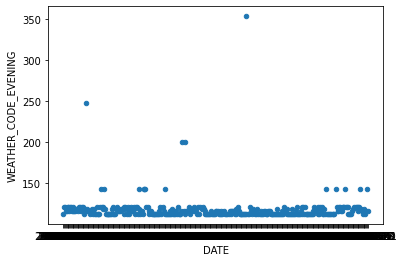

In [ ]:
# Draw a scatterplot with Date on X-axis and WEATHER_CODE_EVENING on Y-axis
df2018.plot.scatter(x = 'DATE',
                    y = 'WEATHER_CODE_EVENING') #Code to complete

#### Boxplot directly with Pandas

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.boxplot.html)

/usr/local/lib/python3.8/dist-packages/matplotlib/cbook/__init__.py:1376: VisibleDeprecationWarning: Creating an ndarray from ragged nested sequences (which is a list-or-tuple of lists-or-tuples-or ndarrays with different lengths or shapes) is deprecated. If you meant to do this, you must specify 'dtype=object' when creating the ndarray.
  X = np.atleast_1d(X.T if isinstance(X, np.ndarray) else np.asarray(X))


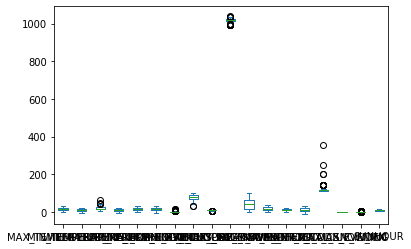

In [ ]:
# Find a way to draw directly with pandas a boxplot on the column WEATHER_CODE_EVENING
df2018.plot.box(by = 'WEATHER_CODE_EVENING')

#### Deciles

Here you can find [a little help](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.quantile.html)

In [ ]:
# Find a way to print the 9 deciles + min + max of the column WEATHER_CODE_EVENING with the quantile method of pandas and a loop
for i in range(0,10, 1) :
  print(i*0.1 ,  df2018['WEATHER_CODE_EVENING'].quantile(i*0.1))

0.0 113.0
0.1 113.0
0.2 113.0
0.30000000000000004 113.0
0.4 113.0
0.5 116.0
0.6000000000000001 116.0
0.7000000000000001 119.0
0.8 122.0
0.9 122.0


#### Fill values
OK it seems that the most of datas are between 113 and 122. Maybe, we could fill the missing values with Mean or Median, it's up to you to choose. So you need :
- Calculate the mean or the median
- Fill the missing values only for **WEATHER_CODE_EVENING** with the `fillna()` method

When you're OK, remember tu use the `inplace=True` argument, otherwise, your modification will not be stored.

In [ ]:
# Hop ! Your code here :

mean_weather_column =  df2018['WEATHER_CODE_EVENING'].mean()     #You have to complete this
df2018['WEATHER_CODE_EVENING'].fillna(mean_weather_column,
                                      inplace = True) # When you are OK, you can replace this argument by True
df2018['WEATHER_CODE_EVENING'].value_counts()

113.000000    154
116.000000     78
122.000000     59
119.000000     34
118.507331     24
143.000000     12
200.000000      2
248.000000      1
353.000000      1
Name: WEATHER_CODE_EVENING, dtype: int64

In [ ]:
# You can use this code to check how many missing values you have :
column_name = 'WEATHER_CODE_EVENING'
print("I have " ,df2018[column_name].isna().sum(), "missing values in the column", column_name)

I have  0 missing values in the column WEATHER_CODE_EVENING


### 3.2 - Next columns : TOTAL_SNOW_MM and UV_INDEX

We trust you to choose right values to fill for both columns

In [ ]:
# Your code here

mean_snow_column =  df2018['TOTAL_SNOW_MM'].mean()
median_uv_column = df2018['UV_INDEX'].median()
df2018['TOTAL_SNOW_MM'].fillna(mean_snow_column, inplace = True)
df2018['UV_INDEX'].fillna(median_uv_column, inplace = True)

### 3.3 - Next column :
SUNHOUR

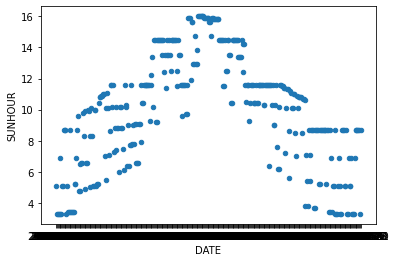

In [ ]:
# Draw a scatterplot with Date on X-axis and SUNHOUR on Y-axis

df2018.plot.scatter(x = 'DATE',
                    y = 'SUNHOUR')

#### Propagation
**It seems this is not a good idea to apply the same value all year long...**

You could use the the `method = 'ffill'` or `'bfill'` argument in `fillna()` to propagate non-null values forward or backward.

In [ ]:
# Your code here
df2018['SUNHOUR'].fillna( method='ffill', inplace = True)

### 3.4 - Column : OPINION
For Opinion, we have not yet idea. So, we can write a new value 'unknown' in this column.

In [ ]:
# Your code here

df2018['OPINION'].fillna( 'unknown', inplace = True)

## Now, each axis should have 365 non-null values.

In [ ]:
df2018.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 365 entries, 0 to 364
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   DATE                    365 non-null    object 
 1   MAX_TEMPERATURE_C       365 non-null    int64  
 2   MIN_TEMPERATURE_C       365 non-null    int64  
 3   WINDSPEED_MAX_KMH       365 non-null    int64  
 4   TEMPERATURE_MORNING_C   365 non-null    int64  
 5   TEMPERATURE_NOON_C      365 non-null    int64  
 6   TEMPERATURE_EVENING_C   365 non-null    int64  
 7   PRECIP_TOTAL_DAY_MM     365 non-null    float64
 8   HUMIDITY_MAX_PERCENT    365 non-null    int64  
 9   VISIBILITY_AVG_KM       365 non-null    float64
 10  PRESSURE_MAX_MB         365 non-null    int64  
 11  CLOUDCOVER_AVG_PERCENT  365 non-null    float64
 12  HEATINDEX_MAX_C         365 non-null    int64  
 13  DEWPOINT_MAX_C          365 non-null    int64  
 14  WINDTEMP_MAX_C          365 non-null    in

## 4 - Visualize your modifications
Draw 4 scatterplots with Date on X-axis, and each of the 4 numeric modified columns on Y-axis :
- The original datas will be in blue
- The new data (your datas) in red

It's the moment to use your "flag" column created at the beginning. It'll be easier in seaborn with `hue` argument.

You should get something like this:

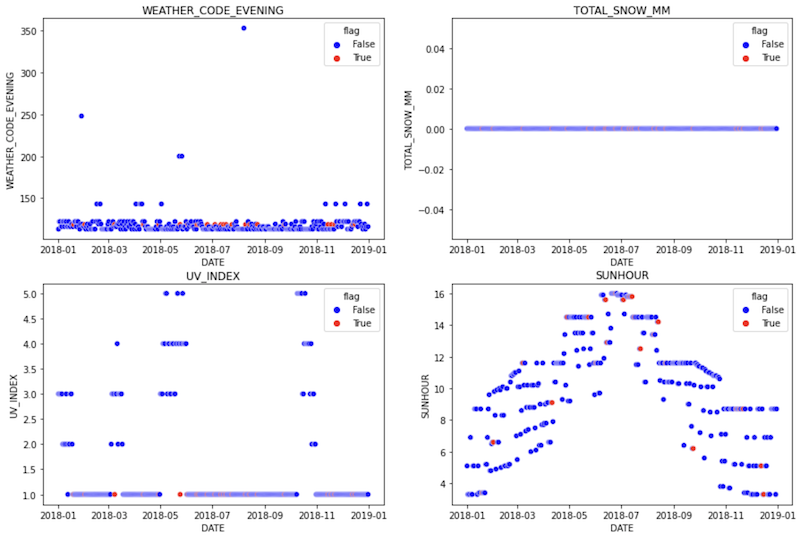

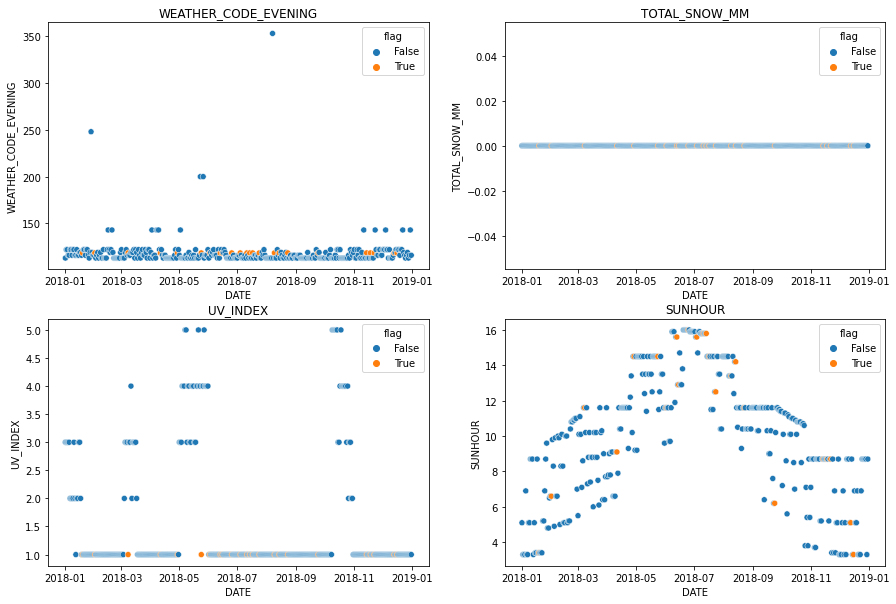

In [ ]:
# Your code here
import matplotlib.pyplot as plt
import seaborn as sns

df2018['DATE'] = pd.to_datetime(df2018['DATE'])

fig = plt.subplots(figsize=(15,10))
ax1 = plt.subplot(221)
ax1 = sns.scatterplot(data = df2018,
                      x = 'DATE',
                      y = 'WEATHER_CODE_EVENING',
                      hue = 'flag')
ax1.set_title('WEATHER_CODE_EVENING')
ax2 = plt.subplot(222)
ax2 = sns.scatterplot(data = df2018,
                      x = 'DATE',
                      y = 'TOTAL_SNOW_MM',
                      hue = 'flag')
ax2.set_title('TOTAL_SNOW_MM')
ax3 = plt.subplot(223)
ax3 = sns.scatterplot(data = df2018,
                      x = 'DATE',
                      y = 'UV_INDEX',
                      hue = 'flag')
ax3.set_title('UV_INDEX')
ax4 = plt.subplot(224)
ax4 = sns.scatterplot(data = df2018,
                      x = 'DATE',
                      y = 'SUNHOUR',
                      hue = 'flag')
ax4.set_title('SUNHOUR')
plt.show()

